<a href="https://colab.research.google.com/github/peshqa/MMO_lab/blob/main/m_lab1_z2-z3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3636 - loss: 1.7303 - val_accuracy: 0.5318 - val_loss: 1.2793
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.5796 - loss: 1.1904 - val_accuracy: 0.6276 - val_loss: 1.0517
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6435 - loss: 1.0119 - val_accuracy: 0.6590 - val_loss: 0.9902
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6834 - loss: 0.9012 - val_accuracy: 0.6752 - val_loss: 0.9523
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7103 - loss: 0.8282 - val_accuracy: 0.6855 - val_loss: 0.9201
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7302 - loss: 0.7677 - val_accuracy: 0.6992 - val_loss: 0.8666
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.7555 - loss: 0.6993 - val_accuracy: 0.6900 - val_loss: 0.9191
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.7663 -

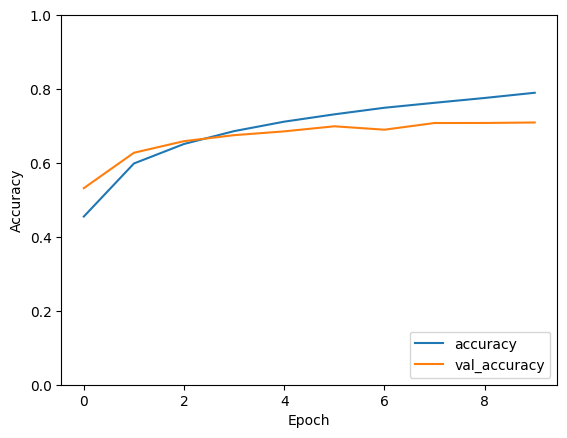

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Загрузка и подготовка данных (CIFAR-10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормализация данных

# Создание модели
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 классов для CIFAR-10
])

# Компиляция модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Визуализация результатов обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.3286
Epoch [2/10], Loss: 0.9677
Epoch [3/10], Loss: 0.8559
Epoch [4/10], Loss: 0.7828
Epoch [5/10], Loss: 0.7332
Epoch [6/10], Loss: 0.6852
Epoch [7/10], Loss: 0.6523
Epoch [8/10], Loss: 0.6296
Epoch [9/10], Loss: 0.5944
Epoch [10/10], Loss: 0.5725
Test Accuracy: 70.24%


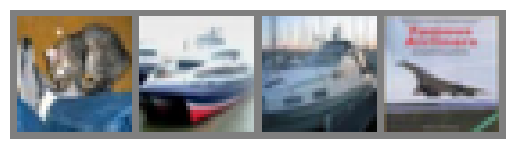

GroundTruth:  cat   ship  ship  plane
Predicted:  dog   dog   deer  horse


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
#import matplotlib.pyplot as plt
import numpy as np

# 1. Load and normalize the CIFAR10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define a Convolutional Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)  # Adjusted for CIFAR-10 image size (after pooling)
        self.fc2 = nn.Linear(64, 10)  # 10 classes

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)  # Flatten the tensor while keeping batch size
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, define the loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 3. Train the network
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()   # Zero the gradients
        outputs = net(inputs)   # Forward pass
        loss = criterion(outputs, labels)   # Compute loss
        loss.backward()         # Backward pass
        optimizer.step()        # Update weights

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}')

# 4. Evaluate the network on the test data
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class index
        total += labels.size(0)                    # Total number of labels
        correct += (predicted == labels).sum().item()  # Count correct predictions

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Optional: Visualize some test images and their predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images and predicted labels
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')         # Hide axes ticks
    plt.show()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))